In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
from numpy import genfromtxt
import random
from random import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
trainDf = pd.read_csv("dataset/train_images.csv",header = None)
trainLabelDf = pd.read_csv("dataset/train_labels.csv")
trainLabelDf = trainLabelDf.rename(columns={'0': 'Class'}, index={'ONE': 'Row_1'})

In [3]:
testDf = pd.read_csv("dataset/test_images.csv",header = None)
testLabelDf = pd.read_csv("dataset/test_labels.csv")
testLabelDf = testLabelDf.rename(columns={'0': 'Class'}, index={'ONE': 'Row_1'})

In [4]:
def showImgFromCsv(whichRow = 0):   
    imgLst = []
    indx = 0
    for col in trainDf.columns:
        if indx % 28 == 0:
            imgLst.append([])
        imgLst[-1].append(trainDf[col][whichRow])
        indx += 1
    del imgLst[-1]
    plt.imshow(imgLst)
    plt.show()

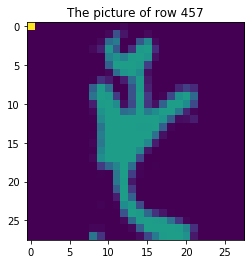

In [5]:
randRow = random.randint(0,1000)
plt.title("The picture of row " + str(randRow))
showImgFromCsv(randRow)

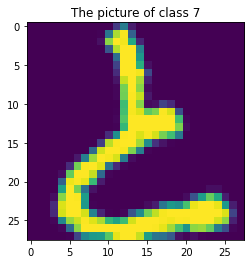

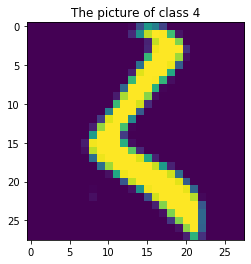

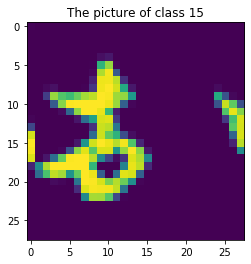

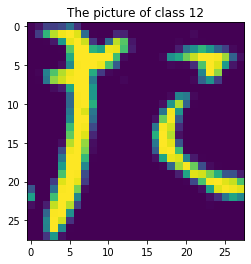

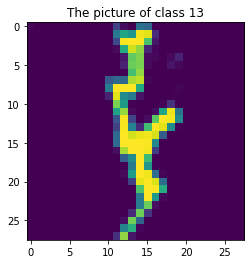

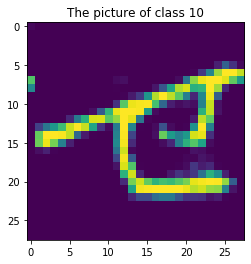

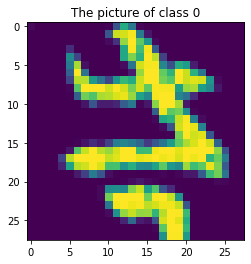

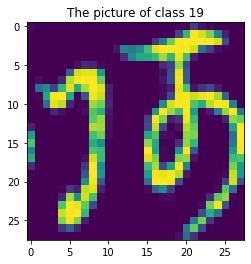

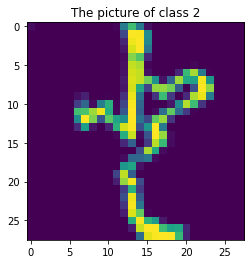

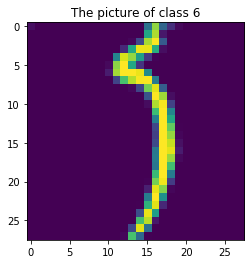

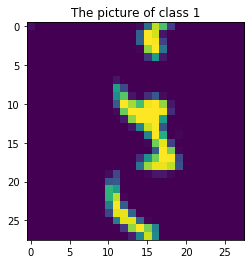

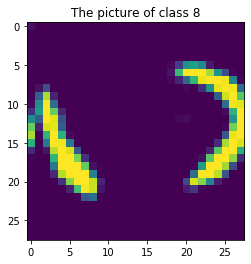

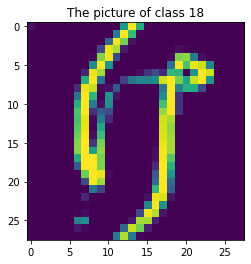

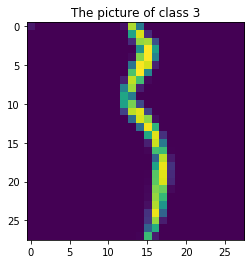

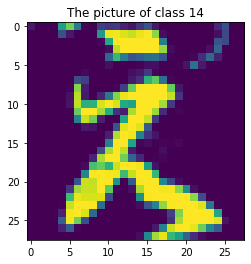

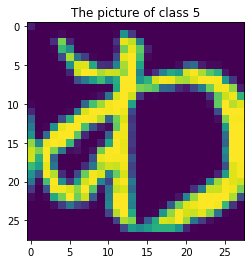

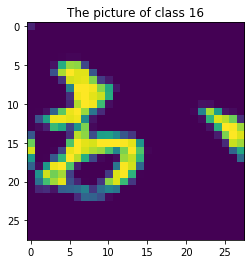

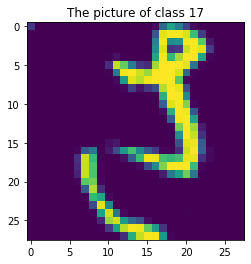

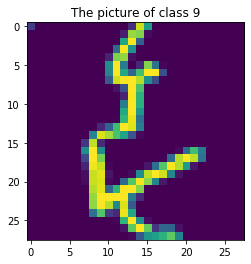

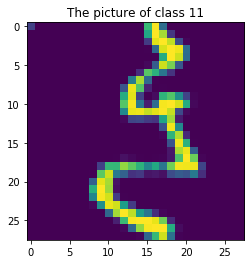

In [6]:
classVisited = {x:False for x in range(0,20)}

indx = 0
row = 1
while True:
    if indx == 20: break
    if classVisited[trainLabelDf['Class'][row]]: 
        row += 1
        continue
    
    plt.title("The picture of class " + str(trainLabelDf['Class'][row]))
    
    showImgFromCsv(row)
    classVisited[trainLabelDf['Class'][row]] = True
    row += 1
    indx += 1

In [7]:
def showNumberOfClasses(whichDf = trainLabelDf):
    xLst = [0] * 20
    
    for row in whichDf['Class']:
        xLst[row] += 1
    return xLst


def showBar(whichCsv):
    if whichCsv == 'Train':
        xLst = showNumberOfClasses()
    else:
        xLst = showNumberOfClasses(testLabelDf)
    plt.bar(range(len(xLst)), xLst,color='royalblue', alpha=0.7)
    plt.title(whichCsv)
    plt.show()

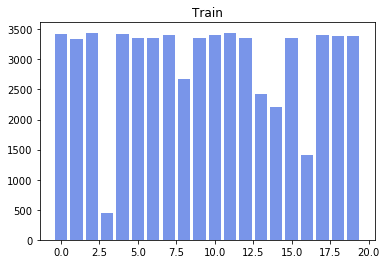

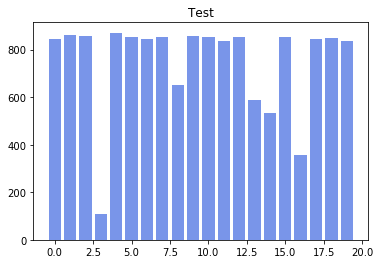

In [8]:
showBar('Train')
showBar('Test')

# Dataloader

In [9]:
class Dataloader:
    
    def __init__(self, data, labels, n_classes, batch_size=None, shuffle=False):
        assert len(data)==len(labels)       
        self.__n_classes = n_classes
        self.__batch_size = batch_size
        self.__shuffle = shuffle
        self.__data = data
        self.__onehot_labels = self.__onehot(labels, self.__n_classes)
    
    def __onehot(self, labels, n_classes):
        # TODO: Implement
        oneHotLst = []
        for label in labels:
            eachRow = [0] * n_classes
            eachRow[int(label)] = 1
            oneHotLst.append(eachRow)
            
        onehot_vectors = np.asmatrix(oneHotLst, dtype=float)
        return onehot_vectors
    
    def __shuffle_dataset(self):
        # TODO: Implement
        lenData = len(self.__data)
        rndomNumbers = np.random.permutation(lenData)
        self.__onehot_labels = self.__onehot_labels[rndomNumbers]
        self.__data = self.__data[rndomNumbers]
        
        
    def __iter__(self):
        if self.__shuffle:
            self.__shuffle_dataset()
            
        if self.__batch_size==None:
            yield (np.matrix(self.__data), np.matrix(self.__onehot_labels))
            return
            
        for idx in range(0, len(self.__data), self.__batch_size):
            yield (np.matrix(self.__data[idx:idx+self.__batch_size]), 
                   np.matrix(self.__onehot_labels[idx:idx+self.__batch_size]))

# Activation Functions

In [10]:
class Identical:
    
    def __init__(self): pass
    
    def __val(self, matrix):
        identical_value = np.matrix(matrix, dtype=float)
        return identical_value

    def derivative(self, matrix):
        temp = np.matrix(matrix, dtype=float)
        identical_derivative = np.matrix(np.full(np.shape(temp), 1.))
        return identical_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)
    

class Relu:
    
    def __init__(self): pass
    
    def __val(self, matrix):
        # TODO: Implement
        relu_value = np.maximum(0, np.matrix(matrix, dtype=float))
        
        return relu_value

    def derivative(self, matrix):
        # TODO: Implement
        relu_derivative = matrix
        relu_derivative[matrix>0] = 1
        relu_derivative[matrix<=0] = 0
        
        return relu_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)

    
class LeakyRelu:
    
    def __init__(self, negative_slope=0.01):
        self.negative_slope = 0.01
    
    def __val(self, matrix):
        # TODO: Implement
        negSlope = self.negative_slope
        matrix = np.where(matrix > 0, matrix, matrix * negSlope)  
        leacky_relu_value = np.matrix(matrix, dtype=float)
        return leacky_relu_value

    def derivative(self, matrix):
        # TODO: Implement
        leacky_relu_derivative = np.matrix(matrix, dtype = float)
        leacky_relu_derivative[matrix>0] = 1
        leacky_relu_derivative[matrix<=0] = self.negative_slope
        
        return leacky_relu_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)

    
class Sigmoid:
    
    def __init__(self): pass

    def __val(self, matrix):
        # TODO: Implement
        sigmoid_value = np.matrix(1/(1 + np.exp(-matrix)), dtype = float)
        return sigmoid_value

    def derivative(self, matrix):
        # TODO: Implement
        oneMinusCallingMatrix = 1 - self.__call__(matrix)
        sigmoid_derivative = np.multiply(self.__val(matrix), np.matrix(oneMinusCallingMatrix))
        return sigmoid_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)


class Softmax:
    
    def __init__(self): pass

    def __val(self, matrix):
        # TODO: Implement
        matrix -= matrix.max(1)
        expMatrixCpy = np.exp(matrix)
        expSumMatrixCpy = np.exp(matrix).sum(1)
        softmax_value = np.matrix(expMatrixCpy/expSumMatrixCpy, dtype=float)
        
        return softmax_value
        
    def __call__(self, matrix):
        return self.__val(matrix)
    
class Tanh:
    
    def __init__(self): pass

    def __val(self, matrix):
        # TODO: Implement
        tanh_value = np.tanh(np.matrix(matrix, dtype=float))
        return tanh_value

    def derivative(self, matrix):
        # TODO: Implement
        tanh_derivative = 1 - np.multiply(self.__val(matrix), self.__val(matrix))
        return tanh_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)

# Loss Function

In [11]:
class CrossEntropy: #(with softmax)
    
    def __init__(self): pass

    def __val(self, true_val, expected_val):
        assert np.shape(true_val)==np.shape(expected_val)
        # TODO: Implement
        softMaxTrueVal = Softmax()(true_val)
        logSoftMax = np.ma.log(softMaxTrueVal)
        cross_entropy_value = -np.multiply(expected_val, logSoftMax)
        cross_entropy_value = cross_entropy_value.sum(1)
        
        return cross_entropy_value
        
    def derivative(self, true_val, expected_val):
        assert np.shape(true_val)==np.shape(expected_val)
        # TODO: Implement
        softMaxTrueVal = Softmax()(true_val)
        cross_entropy_derivative = softMaxTrueVal
        cross_entropy_derivative -= expected_val
        
        return cross_entropy_derivative
    
    def __call__(self, true_val, expected_val):
        return self.__val(true_val, expected_val)

# Layer

In [12]:
class Layer:

    DEFAULT_LOW, DEFAULT_HIGH, DEFAULT_MEAN, DEFAULT_VAR = 0, 0.05, 0., 1.
  
    def __init__(self, input_size, output_size, 
                 activation=Identical(), initial_weight='uniform', **initializing_parameters):
        
        assert type(initial_weight)==str, 'Undefined activation function!'
        
        self.__weight_initializer_dict = {'uniform':self.__uniform_weight, 'normal':self.__normal_weight}
        
        assert initial_weight in self.__weight_initializer_dict, 'Undefined weight initialization function!'


        self.__n_neurons = output_size
        weight_initializer = self.__weight_initializer_dict[initial_weight]
        self.__weight = weight_initializer(input_size, self.__n_neurons, **initializing_parameters)
        self.__bias = weight_initializer(1, self.__n_neurons, **initializing_parameters)
        self.__activation = activation
        
        self.__last_input = None
        self.__last_activation_input = None
        self.__last_activation_output = None
        self.__last_activation_derivative = None
        
    def forward(self, layer_input):
        assert np.ndim(layer_input)==2
        assert np.size(self.__weight,0) == np.size(layer_input,1)
        # TODO: Implement
        
        self.__last_activation_input = self.__bias + np.matmul(layer_input, self.__weight) 
        self.__last_input = layer_input
        self.__last_activation_derivative = self.__activation.derivative(self.__last_activation_input)
        self.__last_activation_output = self.__activation(self.__last_activation_input)
        return self.__last_activation_output
    
    def update_weights(self, backprop_tensor, lr):
        assert np.ndim(backprop_tensor)==2
        assert np.size(backprop_tensor,0) == np.size(self.__last_activation_derivative,0)
        assert np.size(backprop_tensor,1) == self.__n_neurons
        # TODO: Implement
        lastInputTp = self.__last_input.transpose()
        tmpY = np.multiply(backprop_tensor,self.__last_activation_derivative)
        backprop_tensor = np.matmul(tmpY,self.__weight.transpose())
        self.__weight = self.__weight - (lr * np.matmul(lastInputTp,tmpY))
        self.__bias = self.__bias - (lr * np.matmul(np.matrix(np.tile(1, (1, tmpY.shape[0]))),tmpY))
        
        return backprop_tensor

    def __uniform_weight(self, dim1, dim2, **initializing_parameters):
        low, high = self.DEFAULT_LOW, self.DEFAULT_HIGH
        if 'low' in initializing_parameters.keys(): low = initializing_parameters['low']
        if 'high' in initializing_parameters.keys(): high = initializing_parameters['high']
        # TODO: Implement
        weightsUniform = np.random.uniform(low, high, size=(dim1, dim2))
        weights = np.matrix(weightsUniform, dtype = float)
        
        return weights

    def __normal_weight(self, dim1, dim2, **initializing_parameters):
        mean, var = self.DEFAULT_MEAN, self.DEFAULT_VAR
        if 'mean' in initializing_parameters.keys(): mean = initializing_parameters['mean']
        if 'var' in initializing_parameters.keys(): var = initializing_parameters['var']
        # TODO: Implement
        sqrtVar = np.sqrt(var)
        weightsNormal = np.random.normal(mean, sqrtVar, size=(dim1, dim2))
        weights = np.matrix(weightsNormal, dtype = float)
        
        return weights
    
    def getterOutputLayer(self):
        return self.__last_activation_output
    
    @property
    def n_neurons(self): return self.__n_neurons
    
    @property
    def weight(self): return self.__weight
    
    @property
    def bias(self): return self.__bias
    
    @property
    def activation(self): return self.__activation

# Feed Forward Neural Network

In [13]:
class FeedForwardNN:
    
    def __init__(self, input_shape):
        self.trainLst , self.testLst = [] , []

        self.__input_shape = input_shape
        self.__output_shape = None
        
        self.__layers_list = []
        
        self.__lr = None
        self.__loss = None
        
        
    def add_layer(self, n_neurons, activation=Relu(), initial_weight='uniform', **initializing_parameters):
         
        assert type(n_neurons)==int, "Invalid number of neurons for the layer!"
        assert n_neurons>0, "Invalid number of neurons for the layer!"
        
        n_prev_neurons = self.__input_shape if len(self.__layers_list)==0 else self.__layers_list[-1].n_neurons
        new_layer = Layer(n_prev_neurons, n_neurons, activation, initial_weight, **initializing_parameters)
        self.__layers_list.append(new_layer)
        self.__output_shape = self.__layers_list[-1].n_neurons 
      
    
    def set_training_param(self, loss=CrossEntropy(), learning_rate=1e-3):
        assert self.__layers_list, "Uncomplete model!"
        self.__loss = loss
        self.__lr = learning_rate
    
    
    def forward(self, network_input):
        assert type(self.__output_shape) != None, "Model is not compiled!"
        # TODO: Implement
        netwrk = network_input
        for layer in range(len(self.__layers_list)):
            netwrk = self.__layers_list[layer].forward(netwrk)
        network_output = netwrk
        return network_output
    
    
    def fit(self, epochs, trainloader, testloader=None, print_results=True):
        
        assert type(self.__output_shape) != None, "Model is not compiled!"
        assert type(self.__lr) != None and type(self.__loss) != None, "Training paramenters are not set!"

        log = {"train_accuracy":[], "train_loss":[], "test_accuracy":[], "test_loss":[]}
        
        for epoch in range(1, epochs+1):
            self.trainLst = []
            self.testLst = []
            if print_results: 
                print('Epoch {}:'.format(epoch)) 
            average_accuracy, average_loss = self.__train(trainloader)
            log['train_accuracy'].append(average_accuracy)
            log['train_loss'].append(average_loss)
            if print_results:
                print('\tTrain: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
            
            if type(testloader) != type(None):
                average_accuracy, average_loss = self.__test(testloader)
                log['test_accuracy'].append(average_accuracy)
                log['test_loss'].append(average_loss)
                if print_results:
                    print('\tTest: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
                    
        return log
    
    
    def __train(self, trainloader):
        bach_accuracies, batch_losses = [], []
        for x_train, y_train in trainloader:
            batch_accuracy, batch_loss = self.__train_on_batch(x_train, y_train)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)
    
    
    def __test(self, testloader):
        bach_accuracies, batch_losses = [], []
        for x_test, y_test in testloader:
            batch_accuracy, batch_loss = self.__test_on_batch(x_test, y_test)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)

    
    def __train_on_batch(self, x_batch, y_batch):
        # TODO: Implement
        forwardXBatch = self.forward(x_batch)
        outLayer = self.__layers_list[-2].getterOutputLayer()
        self.trainLst.append((y_batch, outLayer))
        batch_average_loss = self.__update_weights(forwardXBatch, y_batch)
        batch_accuracy = self.__compute_accuracy(forwardXBatch,y_batch)
        return (batch_accuracy, batch_average_loss)
        
        
    def __test_on_batch(self, x_batch, y_batch):
        # TODO: Implement
        forwardXBatch = self.forward(x_batch)
        batch_accuracy = self.__compute_accuracy(forwardXBatch,y_batch)
        crossEntropy = CrossEntropy()
        batch_average_loss = np.sum(crossEntropy(forwardXBatch, y_batch))
        batch_average_loss /= len(forwardXBatch)
        outLayer = self.__layers_list[-2].getterOutputLayer()
        self.testLst.append((y_batch, outLayer))
        return (batch_accuracy, batch_average_loss)
            
        
    def __get_labels(self, outputs):
        # TODO: Implement
        return outputs.argmax(axis=1)
    
    
    def __compute_accuracy(self, output, expected_output):
        # TODO: Implement
        outArr = np.array(output)
        expArr = np.array(expected_output)
        return np.sum(np.argmax(outArr, axis=1) \
                          == np.argmax(expArr, axis=1))/len(np.argmax(outArr, axis=1))*100
    
    
    def __update_weights(self, output, y_train):
        # TODO: Implement
        crossEntropy = CrossEntropy()
        valueToSum = crossEntropy(output, y_train)
        batch_average_loss = np.sum(valueToSum)
        batch_average_loss /= len(output)
        updateWeight = crossEntropy.derivative(output, y_train)
        for rev in reversed(self.__layers_list):
            updateWeight = rev.update_weights(updateWeight, self.__lr)
        return batch_average_loss

# Training Sample Code

In [14]:
trainLabelNp = np.genfromtxt("dataset/train_labels.csv", delimiter=',')
trainLabelNp = np.delete(trainLabelNp,0,0)
trainLabelNp = np.delete(trainLabelNp,0,1)
testLabelNp = np.genfromtxt("dataset/test_labels.csv", delimiter=',')
testLabelNp = np.delete(testLabelNp,0,0)
testLabelNp = np.delete(testLabelNp,0,1)

In [15]:
trainNp = trainDf.to_numpy()
testNp = testDf.to_numpy()
trainNp = np.delete(trainNp,0,0)
trainNp = np.delete(trainNp,0,1)
testNp = np.delete(testNp,0,0)
testNp = np.delete(testNp,0,1)

In [16]:
trainNp = trainNp / 255
testNp = testNp / 255

<h2> Zero initialize </h2>


<strong> If all the weights are initialized to zeros, the derivatives will remain same for every w. As a result, neurons will learn same features in each iterations. Therefore, any constant initialization will produce a poor result. </storng>

In [17]:
INPUT_SHAPE = 784
LEARNING_RATE = 1e-3
EPOCHS = 20
TRAINLOADER = []
TESTLOADER = []

train_loader = Dataloader(trainNp, trainLabelNp, 20, batch_size=64, shuffle=True)
for i in train_loader:
    TRAINLOADER.append(i)

test_loader = Dataloader(testNp, testLabelNp, 20, batch_size=64, shuffle=True)
for i in test_loader:
    TESTLOADER.append(i)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(20, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), learning_rate=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 56.67643923240938	Average Loss: 1.5138149157508516
	Test: Average Accuracy: 62.84352836879433	Average Loss: 1.3244191684641633
Epoch 2:
	Train: Average Accuracy: 75.31816364605544	Average Loss: 0.8900622836272759
	Test: Average Accuracy: 67.22739361702128	Average Loss: 1.1841332454114033
Epoch 3:
	Train: Average Accuracy: 78.33655383795309	Average Loss: 0.7873487389440876
	Test: Average Accuracy: 69.2752659574468	Average Loss: 1.1200289513661887
Epoch 4:
	Train: Average Accuracy: 79.94236407249467	Average Loss: 0.7256567330872741
	Test: Average Accuracy: 70.35017730496453	Average Loss: 1.0829593307306455
Epoch 5:
	Train: Average Accuracy: 81.11007462686567	Average Loss: 0.6852503075348914
	Test: Average Accuracy: 71.05053191489361	Average Loss: 1.0570779016913714
Epoch 6:
	Train: Average Accuracy: 81.88466151385927	Average Loss: 0.6553366711458581
	Test: Average Accuracy: 71.72872340425532	Average Loss: 1.0385332366532745
Epoch 7:
	Train: Average Accu

<h2> Different Learning rates </h2>

<strong>
The learning rate is a hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated. <br/>
Learning rate affects gradient descent process which tweaks the weights based on the loss value

</strong>

In [18]:
INPUT_SHAPE = 784
LEARNING_RATE = 1e-3 / 10
EPOCHS = 20
TRAINLOADER = []
TESTLOADER = []

train_loader = Dataloader(trainNp, trainLabelNp, 20, batch_size=64, shuffle=True)
for i in train_loader:
    TRAINLOADER.append(i)

test_loader = Dataloader(testNp, testLabelNp, 20, batch_size=64, shuffle=True)
for i in test_loader:
    TESTLOADER.append(i)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(20, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), learning_rate=LEARNING_RATE)

print("With learning rate",LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

With learning rate 0.0001
Epoch 1:
	Train: Average Accuracy: 10.392790511727078	Average Loss: 2.862832271543206
	Test: Average Accuracy: 17.174202127659573	Average Loss: 2.6933895646337755
Epoch 2:
	Train: Average Accuracy: 33.605410447761194	Average Loss: 2.356261876171945
	Test: Average Accuracy: 38.74113475177305	Average Loss: 2.216646458196899
Epoch 3:
	Train: Average Accuracy: 55.42377398720682	Average Loss: 1.7392086234543185
	Test: Average Accuracy: 49.02925531914894	Average Loss: 1.799248847657649
Epoch 4:
	Train: Average Accuracy: 63.05470415778252	Average Loss: 1.3682188744861938
	Test: Average Accuracy: 53.692375886524815	Average Loss: 1.6113751593874086
Epoch 5:
	Train: Average Accuracy: 66.93596748400853	Average Loss: 1.2032048813958562
	Test: Average Accuracy: 56.422872340425535	Average Loss: 1.511921963524562
Epoch 6:
	Train: Average Accuracy: 69.21808368869937	Average Loss: 1.1132755670267307
	Test: Average Accuracy: 58.337765957446805	Average Loss: 1.447878533202966
Ep

In [19]:
INPUT_SHAPE = 784
LEARNING_RATE = 1e-3 * 10
EPOCHS = 20
TRAINLOADER = []
TESTLOADER = []

train_loader = Dataloader(trainNp, trainLabelNp, 20, batch_size=64, shuffle=True)
for i in train_loader:
    TRAINLOADER.append(i)

test_loader = Dataloader(testNp, testLabelNp, 20, batch_size=64, shuffle=True)
for i in test_loader:
    TESTLOADER.append(i)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(20, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), learning_rate=LEARNING_RATE)

print("With learning rate",LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

With learning rate 0.01
Epoch 1:
	Train: Average Accuracy: 61.83702025586354	Average Loss: 1.2837946124970834
	Test: Average Accuracy: 66.99246453900709	Average Loss: 1.2455252642973496
Epoch 2:
	Train: Average Accuracy: 76.9389658848614	Average Loss: 0.8099242535810431
	Test: Average Accuracy: 68.614804964539	Average Loss: 1.1801202590667867
Epoch 3:
	Train: Average Accuracy: 78.99620202558636	Average Loss: 0.7381982794039151
	Test: Average Accuracy: 69.21985815602837	Average Loss: 1.1629141289254679
Epoch 4:
	Train: Average Accuracy: 79.97234808102345	Average Loss: 0.7034069058068995
	Test: Average Accuracy: 69.78945035460994	Average Loss: 1.136032326086549
Epoch 5:
	Train: Average Accuracy: 80.54371002132196	Average Loss: 0.6829266501951314
	Test: Average Accuracy: 70.22384751773049	Average Loss: 1.1233627019262242
Epoch 6:
	Train: Average Accuracy: 80.88852611940298	Average Loss: 0.669071058407561
	Test: Average Accuracy: 70.39007092198581	Average Loss: 1.1308279890664625
Epoch 7:


In [20]:
INPUT_SHAPE = 784
LEARNING_RATE = 1e-3
EPOCHS = 20
TRAINLOADER = []
TESTLOADER = []

train_loader = Dataloader(trainNp, trainLabelNp, 20, batch_size=64, shuffle=True)
for i in train_loader:
    TRAINLOADER.append(i)

test_loader = Dataloader(testNp, testLabelNp, 20, batch_size=64, shuffle=True)
for i in test_loader:
    TESTLOADER.append(i)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(20, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), learning_rate=LEARNING_RATE)

print("With Leaky relu activation function")
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

With Leaky relu activation function
Epoch 1:
	Train: Average Accuracy: 56.59315031982943	Average Loss: 1.5107340307601838
	Test: Average Accuracy: 63.14494680851064	Average Loss: 1.331381871528696
Epoch 2:
	Train: Average Accuracy: 75.2048907249467	Average Loss: 0.9016420629886183
	Test: Average Accuracy: 66.69991134751773	Average Loss: 1.2121184844325439
Epoch 3:
	Train: Average Accuracy: 78.10667643923242	Average Loss: 0.8044062591219392
	Test: Average Accuracy: 68.51285460992908	Average Loss: 1.1529254282025772
Epoch 4:
	Train: Average Accuracy: 79.71415245202559	Average Loss: 0.7468615797123423
	Test: Average Accuracy: 69.6875	Average Loss: 1.1125664964655761
Epoch 5:
	Train: Average Accuracy: 80.77192164179104	Average Loss: 0.7061876536025884
	Test: Average Accuracy: 70.53191489361703	Average Loss: 1.0866035277961195
Epoch 6:
	Train: Average Accuracy: 81.61813699360341	Average Loss: 0.6757234628379263
	Test: Average Accuracy: 71.23448581560282	Average Loss: 1.065392195175223
Epoch

In [21]:
INPUT_SHAPE = 784
LEARNING_RATE = 1e-3
EPOCHS = 20
TRAINLOADER = []
TESTLOADER = []

train_loader = Dataloader(trainNp, trainLabelNp, 20, batch_size=64, shuffle=True)
for i in train_loader:
    TRAINLOADER.append(i)

test_loader = Dataloader(testNp, testLabelNp, 20, batch_size=64, shuffle=True)
for i in test_loader:
    TESTLOADER.append(i)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, input_shape=INPUT_SHAPE, activation=Sigmoid(), weight_initializer='uniform')
network.add_layer(20, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), learning_rate=LEARNING_RATE)

print("With Sigmoid activation function")
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

With Sigmoid activation function
Epoch 1:
	Train: Average Accuracy: 6.32829157782516	Average Loss: 2.9485622662404007
	Test: Average Accuracy: 11.041666666666668	Average Loss: 2.9287215195670147
Epoch 2:
	Train: Average Accuracy: 18.018723347547976	Average Loss: 2.713472183619289
	Test: Average Accuracy: 20.050975177304963	Average Loss: 2.542032910643084
Epoch 3:
	Train: Average Accuracy: 35.319496268656714	Average Loss: 2.2092787524286286
	Test: Average Accuracy: 36.45833333333333	Average Loss: 2.1205651839921544
Epoch 4:
	Train: Average Accuracy: 53.43483475479744	Average Loss: 1.7352205651712367
	Test: Average Accuracy: 47.10549645390071	Average Loss: 1.8245566193441622
Epoch 5:
	Train: Average Accuracy: 62.90644989339019	Average Loss: 1.419690042976675
	Test: Average Accuracy: 54.01152482269503	Average Loss: 1.6197032158977933
Epoch 6:
	Train: Average Accuracy: 68.31856343283582	Average Loss: 1.2183282985917887
	Test: Average Accuracy: 58.44858156028369	Average Loss: 1.486395384696

<h2> Leaky Relu </h2>

<strong> 
   Leaky ReLU has a small slope for negative values, instead of altogether zero. <br/>
to avoid overflow we can divide all values by 10. <br/>

Leaky Relu has two benefits over Relu:
    
<ul>
  <li>It fixes the “dying Relu” problem, as it doesn’t have zero-slope parts.</li>
  <li>It speeds up training. There is evidence that having the “mean activation” be close to 0 makes training faster. </li>
</ul>
</strong>

<h2> Sigmoid and Tanh </h2>

<strong>
    Smooth gradient functions which they bound their output to [0, 1] interval, but they have the vanishing gradient problem when very large values which the output becomes close to 1 and very small values the output becomes close to 0 causing the derivative of these functions becoming more close to 0 hence no change during the updates of the weights.
</strong>

In [22]:
INPUT_SHAPE = 784
LEARNING_RATE = 1e-3
EPOCHS = 20
TRAINLOADER = []
TESTLOADER = []

train_loader = Dataloader(trainNp, trainLabelNp, 20, batch_size=64, shuffle=True)
for i in train_loader:
    TRAINLOADER.append(i)

test_loader = Dataloader(testNp, testLabelNp, 20, batch_size=64, shuffle=True)
for i in test_loader:
    TESTLOADER.append(i)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, input_shape=INPUT_SHAPE, activation=Sigmoid(), weight_initializer='uniform')
network.add_layer(20, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), learning_rate=LEARNING_RATE)

print("With Sigmoid activation function")
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

With Sigmoid activation function
Epoch 1:
	Train: Average Accuracy: 6.3799307036247335	Average Loss: 2.9458632043067134
	Test: Average Accuracy: 10.607269503546098	Average Loss: 2.908877290452564
Epoch 2:
	Train: Average Accuracy: 17.73387526652452	Average Loss: 2.696388639460162
	Test: Average Accuracy: 20.6781914893617	Average Loss: 2.5542462409444093
Epoch 3:
	Train: Average Accuracy: 33.30557036247335	Average Loss: 2.2961266092592196
	Test: Average Accuracy: 33.0895390070922	Average Loss: 2.226847327492035
Epoch 4:
	Train: Average Accuracy: 50.20655650319829	Average Loss: 1.863280547724399
	Test: Average Accuracy: 46.0438829787234	Average Loss: 1.903282997166949
Epoch 5:
	Train: Average Accuracy: 60.23454157782516	Average Loss: 1.5154617806134074
	Test: Average Accuracy: 52.54210992907801	Average Loss: 1.685838297843283
Epoch 6:
	Train: Average Accuracy: 65.62666577825159	Average Loss: 1.3034310290993658
	Test: Average Accuracy: 56.23226950354609	Average Loss: 1.5455861221979386
Ep

In [23]:
INPUT_SHAPE = 784
LEARNING_RATE = 1e-3
EPOCHS = 20
TRAINLOADER = []
TESTLOADER = []

train_loader = Dataloader(trainNp, trainLabelNp, 20, batch_size=64, shuffle=True)
for i in train_loader:
    TRAINLOADER.append(i)

test_loader = Dataloader(testNp, testLabelNp, 20, batch_size=64, shuffle=True)
for i in test_loader:
    TESTLOADER.append(i)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, input_shape=INPUT_SHAPE, activation=Tanh(), weight_initializer='uniform')
network.add_layer(20, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), learning_rate=LEARNING_RATE)

print("With Sigmoid activation function")
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

With Sigmoid activation function
Epoch 1:
	Train: Average Accuracy: 9.9613539445629	Average Loss: 2.8543523619930458
	Test: Average Accuracy: 21.017287234042552	Average Loss: 2.5695952556169166
Epoch 2:
	Train: Average Accuracy: 33.455490405117274	Average Loss: 2.1203970977911064
	Test: Average Accuracy: 37.80806737588652	Average Loss: 2.035644495342918
Epoch 3:
	Train: Average Accuracy: 54.28604744136461	Average Loss: 1.5593103388749976
	Test: Average Accuracy: 49.514627659574465	Average Loss: 1.7174759835493176
Epoch 4:
	Train: Average Accuracy: 65.16524520255864	Average Loss: 1.2317732834475195
	Test: Average Accuracy: 55.84219858156029	Average Loss: 1.5346695682102
Epoch 5:
	Train: Average Accuracy: 69.87106876332622	Average Loss: 1.072882545993089
	Test: Average Accuracy: 59.441489361702125	Average Loss: 1.4331869216292068
Epoch 6:
	Train: Average Accuracy: 72.37306769722815	Average Loss: 0.9879563566786747
	Test: Average Accuracy: 61.023936170212764	Average Loss: 1.38102053849487

<h2> Batch size </h2>

<strong> 
    Smaller batches perform better on train data but they may lead to overfitting. Moreover another disadvantage is its so much slower in larger values. Large batch size allows faster computation and learning process, on the other hand it reaches a minimal that a small batch may not reach. Also a smaller batch needs a smaller learning rate to avoid over shooting the goal. in the large batch we will have a better average error than small batches.
    
</strong>

In [24]:
INPUT_SHAPE = 784
LEARNING_RATE = 1e-3
EPOCHS = 20
TRAINLOADER = []
TESTLOADER = []

train_loader = Dataloader(trainNp, trainLabelNp, 20, batch_size=16, shuffle=True)
for i in train_loader:
    TRAINLOADER.append(i)

test_loader = Dataloader(testNp, testLabelNp, 20, batch_size=16, shuffle=True)
for i in test_loader:
    TESTLOADER.append(i)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(20, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), learning_rate=LEARNING_RATE)

print("With Batch Size 16 function")
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

With Batch Size 16 function
Epoch 1:
	Train: Average Accuracy: 56.57833333333333	Average Loss: 1.506761877042496
	Test: Average Accuracy: 62.44003198294243	Average Loss: 1.3327679881491488
Epoch 2:
	Train: Average Accuracy: 75.51166666666667	Average Loss: 0.888115617331295
	Test: Average Accuracy: 66.6044776119403	Average Loss: 1.2152336828449057
Epoch 3:
	Train: Average Accuracy: 78.11833333333334	Average Loss: 0.8017040280241191
	Test: Average Accuracy: 68.05037313432835	Average Loss: 1.164140664130847
Epoch 4:
	Train: Average Accuracy: 79.53833333333333	Average Loss: 0.7524210151372303
	Test: Average Accuracy: 69.02318763326225	Average Loss: 1.1302409829775133
Epoch 5:
	Train: Average Accuracy: 80.56	Average Loss: 0.7148990112512595
	Test: Average Accuracy: 70.0959488272921	Average Loss: 1.094857722720471
Epoch 6:
	Train: Average Accuracy: 81.40833333333333	Average Loss: 0.6818360185436126
	Test: Average Accuracy: 70.78891257995735	Average Loss: 1.066983692416199
Epoch 7:
	Train: Av

In [25]:
INPUT_SHAPE = 784
LEARNING_RATE = 1e-3
EPOCHS = 20
TRAINLOADER = []
TESTLOADER = []

train_loader = Dataloader(trainNp, trainLabelNp, 20, batch_size=32, shuffle=True)
for i in train_loader:
    TRAINLOADER.append(i)

test_loader = Dataloader(testNp, testLabelNp, 20, batch_size=32, shuffle=True)
for i in test_loader:
    TESTLOADER.append(i)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(20, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), learning_rate=LEARNING_RATE)

print("With Batch Size 32 function")
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

With Batch Size 32 function
Epoch 1:
	Train: Average Accuracy: 56.52333333333333	Average Loss: 1.5033541454479429
	Test: Average Accuracy: 62.624378109452735	Average Loss: 1.3408705771065998
Epoch 2:
	Train: Average Accuracy: 75.57166666666667	Average Loss: 0.8780464394239947
	Test: Average Accuracy: 66.7888237384506	Average Loss: 1.2030048023258144
Epoch 3:
	Train: Average Accuracy: 78.81666666666666	Average Loss: 0.7720268024155351
	Test: Average Accuracy: 69.02096659559346	Average Loss: 1.1359004943092768
Epoch 4:
	Train: Average Accuracy: 80.82	Average Loss: 0.7053688660647572
	Test: Average Accuracy: 70.02709665955935	Average Loss: 1.0921551377870176
Epoch 5:
	Train: Average Accuracy: 82.02833333333334	Average Loss: 0.6627865368820375
	Test: Average Accuracy: 70.58679815209666	Average Loss: 1.0652507880215443
Epoch 6:
	Train: Average Accuracy: 82.745	Average Loss: 0.6342154437399143
	Test: Average Accuracy: 71.27309879175552	Average Loss: 1.0478166056866745
Epoch 7:
	Train: Averag

In [26]:
INPUT_SHAPE = 784
LEARNING_RATE = 1e-3
EPOCHS = 20
TRAINLOADER = []
TESTLOADER = []

train_loader = Dataloader(trainNp, trainLabelNp, 20, batch_size=256, shuffle=True)
for i in train_loader:
    TRAINLOADER.append(i)

test_loader = Dataloader(testNp, testLabelNp, 20, batch_size=256, shuffle=True)
for i in test_loader:
    TESTLOADER.append(i)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(20, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), learning_rate=LEARNING_RATE)

print("With Batch Size 256 function")
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

With Batch Size 256 function
Epoch 1:
	Train: Average Accuracy: 52.94824911347518	Average Loss: 1.6759239379111475
	Test: Average Accuracy: 63.378470673505795	Average Loss: 1.3175281112462964
Epoch 2:
	Train: Average Accuracy: 76.21010638297872	Average Loss: 0.8693561996030016
	Test: Average Accuracy: 68.45311106155218	Average Loss: 1.1520735101347657
Epoch 3:
	Train: Average Accuracy: 79.74346187943262	Average Loss: 0.7464496368567044
	Test: Average Accuracy: 70.53272747546833	Average Loss: 1.0849683221762227
Epoch 4:
	Train: Average Accuracy: 81.25941932624113	Average Loss: 0.6886543489445036
	Test: Average Accuracy: 71.41119814897412	Average Loss: 1.0508351150486182
Epoch 5:
	Train: Average Accuracy: 82.15647163120569	Average Loss: 0.65456307772371
	Test: Average Accuracy: 72.19244814897412	Average Loss: 1.0297656271701923
Epoch 6:
	Train: Average Accuracy: 82.79144503546101	Average Loss: 0.6298694414037955
	Test: Average Accuracy: 72.481670941124	Average Loss: 1.015541933800292
Epo

<h2> Raise Epoch number </h2>

<strong> 
Overfitting is "" the production of an analysis that corresponds too closely to a particular set of data, and may therefore fail to fit additional data or predict future observations reliably"". <br/>
    the solution to avoid overfitting is called <u> early-stopping </u>.


</strong>

In [27]:
INPUT_SHAPE = 784
LEARNING_RATE = 1e-3
EPOCHS = 80
TRAINLOADER = []
TESTLOADER = []

train_loader = Dataloader(trainNp, trainLabelNp, 20, batch_size=256, shuffle=True)
for i in train_loader:
    TRAINLOADER.append(i)

test_loader = Dataloader(testNp, testLabelNp, 20, batch_size=256, shuffle=True)
for i in test_loader:
    TESTLOADER.append(i)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(20, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), learning_rate=LEARNING_RATE)

print("With Epoch {} function".format(EPOCHS))
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

With Epoch 80 function
Epoch 1:
	Train: Average Accuracy: 55.59951241134752	Average Loss: 1.581214681295389
	Test: Average Accuracy: 62.68119982158787	Average Loss: 1.317834162466542
Epoch 2:
	Train: Average Accuracy: 75.9092420212766	Average Loss: 0.8713714019777333
	Test: Average Accuracy: 68.1154521632471	Average Loss: 1.1580325951473476
Epoch 3:
	Train: Average Accuracy: 79.42265070921985	Average Loss: 0.7565654134467157
	Test: Average Accuracy: 70.17903936217662	Average Loss: 1.0866753546320203
Epoch 4:
	Train: Average Accuracy: 81.10261524822695	Average Loss: 0.6936296859214791
	Test: Average Accuracy: 71.51050958965209	Average Loss: 1.0460421672212616
Epoch 5:
	Train: Average Accuracy: 82.03291223404256	Average Loss: 0.6558311668204938
	Test: Average Accuracy: 72.10881746208742	Average Loss: 1.0219650280126846
Epoch 6:
	Train: Average Accuracy: 82.73936170212765	Average Loss: 0.6297911122078824
	Test: Average Accuracy: 72.60328389830508	Average Loss: 1.006459343839921
Epoch 7:
	

	Train: Average Accuracy: 87.24235372340425	Average Loss: 0.45275041328673893
	Test: Average Accuracy: 74.4285236396075	Average Loss: 1.0123694679129496
Epoch 53:
	Train: Average Accuracy: 87.25953014184398	Average Loss: 0.45189348489885706
	Test: Average Accuracy: 74.44176516503123	Average Loss: 1.0132726391525604
Epoch 54:
	Train: Average Accuracy: 87.30441046099291	Average Loss: 0.45086992130506487
	Test: Average Accuracy: 74.37555753791258	Average Loss: 1.0151262913056749
Epoch 55:
	Train: Average Accuracy: 87.31105939716313	Average Loss: 0.44990571326168416
	Test: Average Accuracy: 74.43514440231937	Average Loss: 1.0160434801395881
Epoch 56:
	Train: Average Accuracy: 87.33433067375887	Average Loss: 0.44907777134266536
	Test: Average Accuracy: 74.33130296610169	Average Loss: 1.0184411803434459
Epoch 57:
	Train: Average Accuracy: 87.37921099290782	Average Loss: 0.44805924936312685
	Test: Average Accuracy: 74.38879906333631	Average Loss: 1.018579269108543
Epoch 58:
	Train: Average Ac

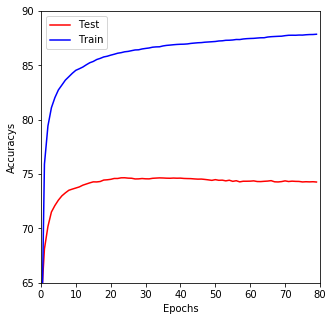

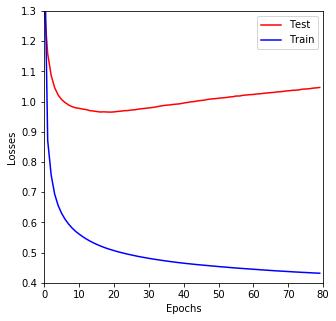

In [33]:
epochAcc = log.copy()
plt.figure(figsize=(5, 5))
plt.plot(epochAcc['test_accuracy'], label='Test', color = 'red')
plt.plot(epochAcc['train_accuracy'], label='Train', color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracys')
plt.xlim(0, 80)
plt.ylim(65,90)
plt.legend()
plt.show()
plt.figure(figsize=(5, 5))
plt.plot(epochAcc['test_loss'], label='Test', color = 'red')
plt.plot(epochAcc['train_loss'], label='Train', color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.xlim(0, 80)
plt.ylim(0.4,1.3)
plt.legend()
plt.show()